
## **_1. Import Libraries_**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier


## _**2. Load Dataset**_

In [ ]:
file_path = "C:/Users/HP/Desktop/data/flood_risk_dataset_india.csv"
df = pd.read_csv(file_path)

print("Shape:", df.shape)
print(df.head())

Shape: (10000, 14)
    Latitude  Longitude  Rainfall (mm)  Temperature (°C)  Humidity (%)  \
0  18.861663  78.835584     218.999493         34.144337     43.912963   
1  35.570715  77.654451      55.353599         28.778774     27.585422   
2  29.227824  73.108463     103.991908         43.934956     30.108738   
3  25.361096  85.610733     198.984191         21.569354     34.453690   
4  12.524541  81.822101     144.626803         32.635692     36.292267   

   River Discharge (m³/s)  Water Level (m)  Elevation (m)    Land Cover  \
0             4236.182888         7.415552     377.465433    Water Body   
1             2472.585219         8.811019    7330.608875        Forest   
2              977.328053         4.631799    2205.873488  Agricultural   
3             3683.208933         2.891787    2512.277800        Desert   
4             2093.390678         3.188466    2001.818223  Agricultural   

  Soil Type  Population Density  Infrastructure  Historical Floods  \
0      Clay    

## **_3. Data Cleaning_**

In [ ]:
# Check duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Encode categorical columns
label_encoders = {}
for col in ["Land Cover", "Soil Type"]:
    le = LabelEncoder()
df[col] = le.fit_transform(df[col])
label_encoders[col] = le

## **_4. Exploratory Data Analysis (Detailed)_**

### _Target Variable Analysis_

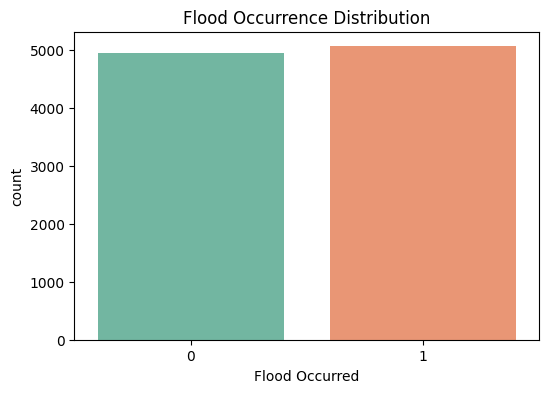

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Flood Occurred",
              data=df,
              hue="Flood Occurred",
              palette="Set2",
              legend=False)
plt.title("Flood Occurrence Distribution")
plt.show()

### **_Univariate Analysis_**

In [ ]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.drop("Flood Occurred")

#### _Histograms_

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

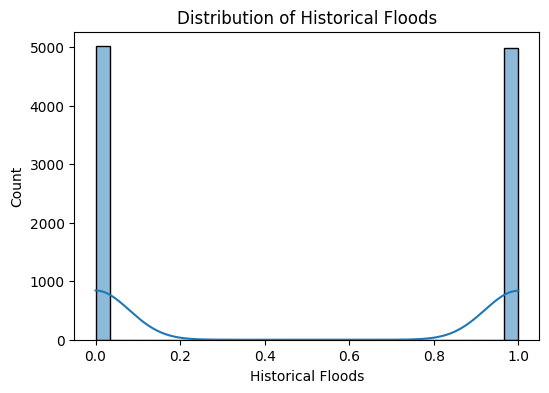

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
sns.histplot(df[col], kde=True, bins=30)
plt.title(f"Distribution of {col}")
plt.show()

#### _Boxplots for Outlier Detection_

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

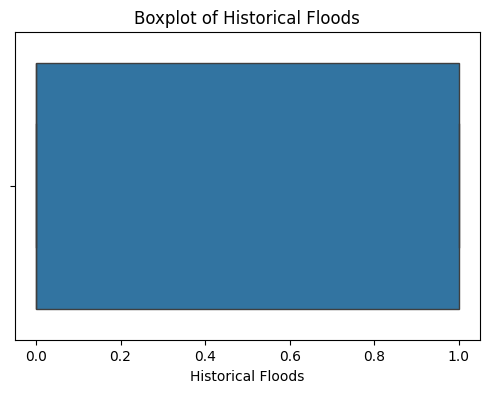

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
sns.boxplot(x=df[col])
plt.title(f"Boxplot of {col}")
plt.show()

### **_Categorical Analysis_**

<Figure size 600x400 with 0 Axes>

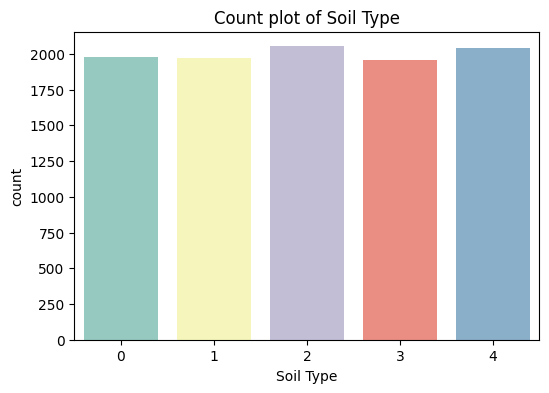

In [ ]:
for col in ["Land Cover", "Soil Type"]:
    plt.figure(figsize=(6,4))
sns.countplot(x=col,
              data=df,
              hue=col,
              palette="Set3",
              legend=False)
plt.title(f"Count plot of {col}")
plt.show()

### **_Bivariate Analysis_**

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

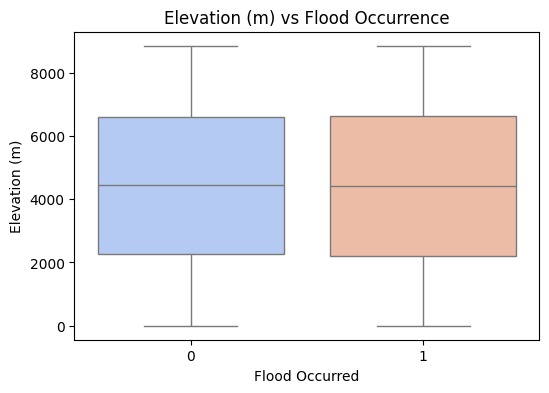

In [ ]:
for col in ["Rainfall (mm)",
            "River Discharge (m³/s)",
            "Water Level (m)",
            "Elevation (m)"]:
    plt.figure(figsize=(6,4))
sns.boxplot(x="Flood Occurred",
            y=col,
            hue="Flood Occurred",
            data=df,
            palette="coolwarm",
            legend=False)
plt.title(f"{col} vs Flood Occurrence")
plt.show()

### **_Multivariate Analysis_**

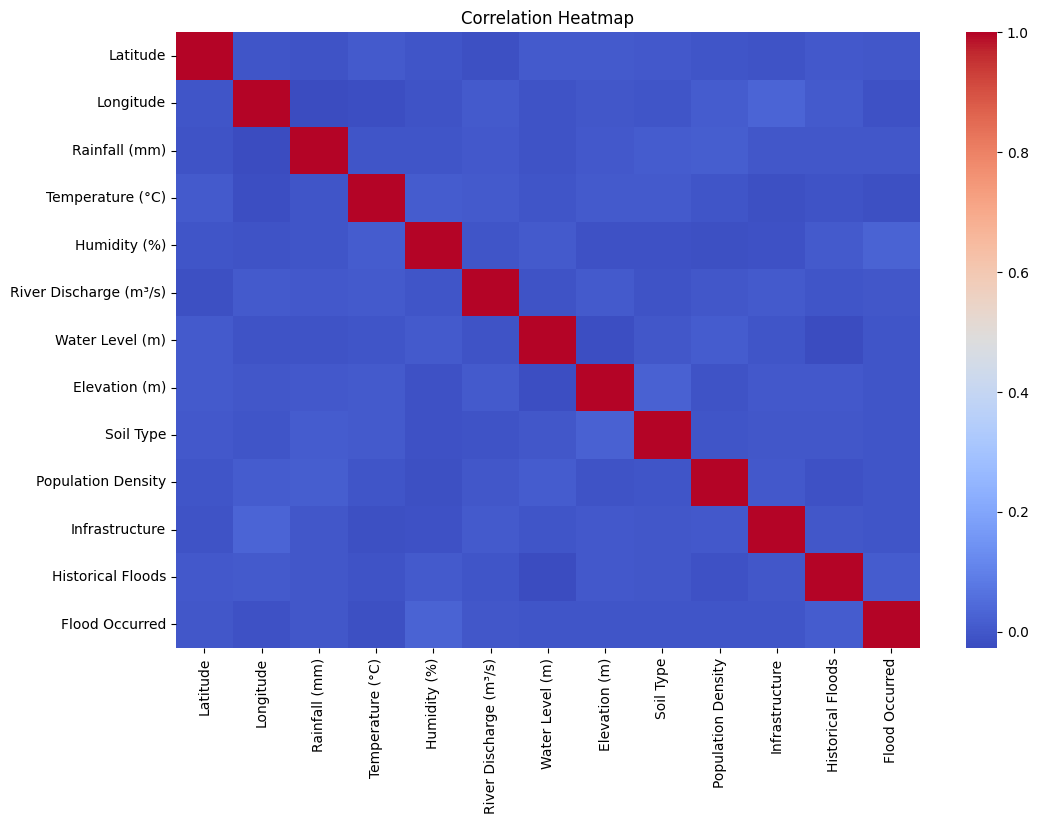

In [ ]:
# Correlation Heatmap (numeric only)
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(),
            annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### **_Pairplot (sample for major features)_**

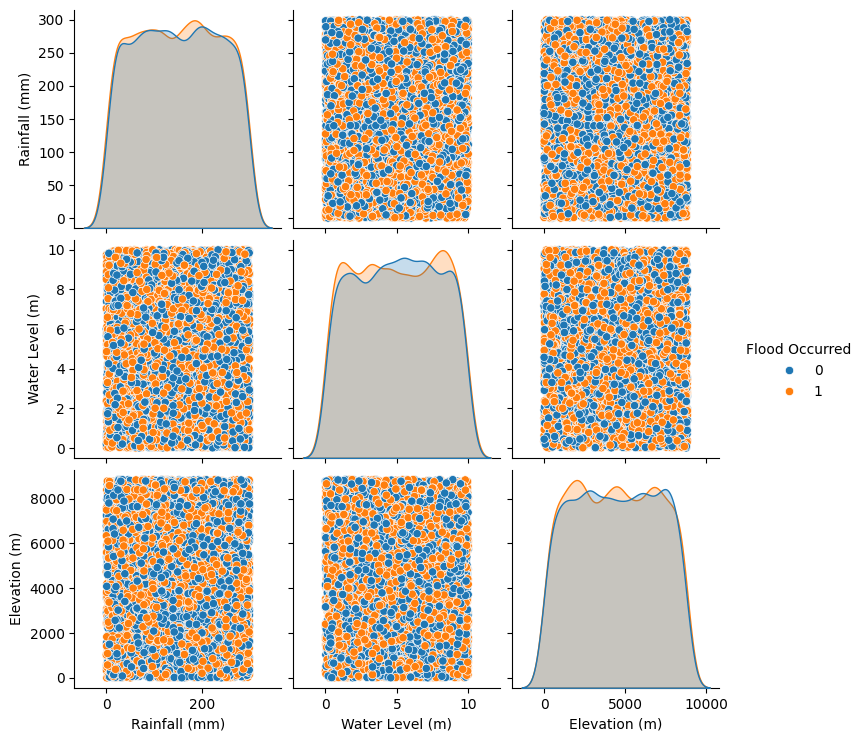

In [ ]:
sns.pairplot(df[["Rainfall (mm)",
                 "Water Level (m)",
                 "Elevation (m)",
                 "Flood Occurred"]], hue="Flood Occurred")
plt.show()


## **_5. Feature Selection & Preprocessing_**

In [ ]:
X = df.drop("Flood Occurred", axis=1)
y = df["Flood Occurred"]

### **_Scale numerical features_**

In [ ]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [ ]:
for col in numeric_cols:
    X[col] = pd.to_numeric(X[col], errors='coerce')

In [ ]:
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())
X[categorical_cols] = X[categorical_cols].fillna(X[categorical_cols].mode().iloc[0])

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

## **_6. Train-Test Split_**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

## **_7. Model Training (Random Forest)_**

In [ ]:
rf = RandomForestClassifier(random_state=42)

### **_Hyperparameter tuning_**

In [ ]:
params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

clf = GridSearchCV(rf, params, cv=3, scoring='accuracy', n_jobs=-1)
clf.fit(X_train, y_train)

print("Best Params:", clf.best_params_)

Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


## **_8. Model Evaluation_**

In [ ]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.51

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.43      0.46       989
           1       0.51      0.59      0.55      1011

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



### _Confusion Matrix_

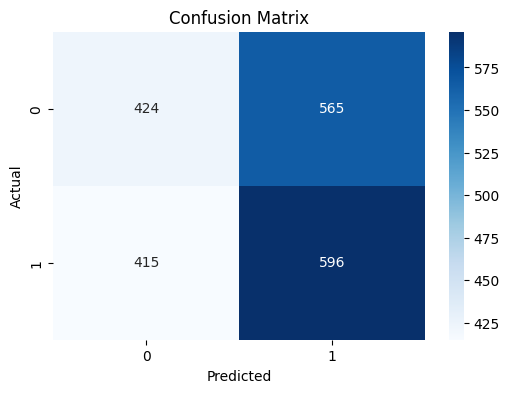

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### _Feature Importance_

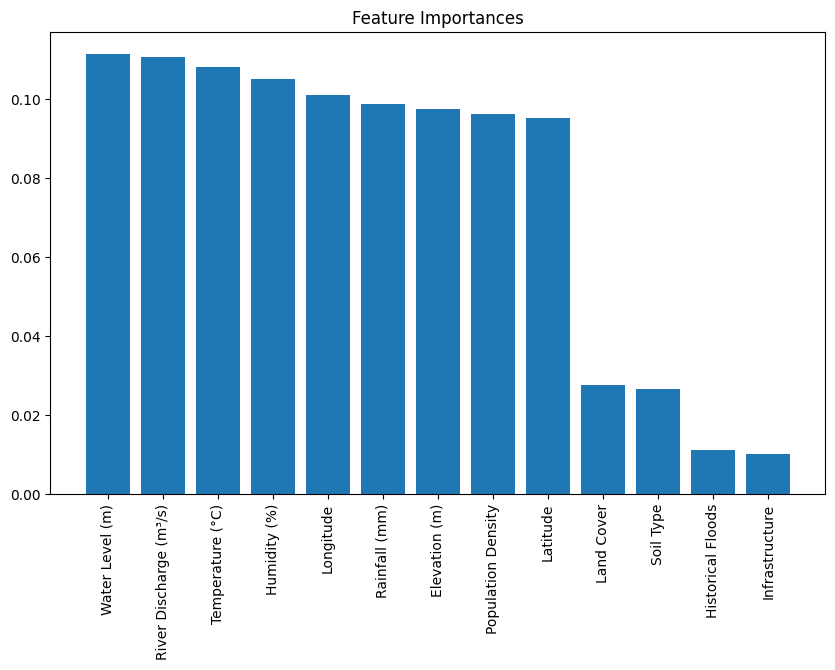

In [ ]:
importances = clf.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Feature Importances")
plt.show()

### _ROC Curve_

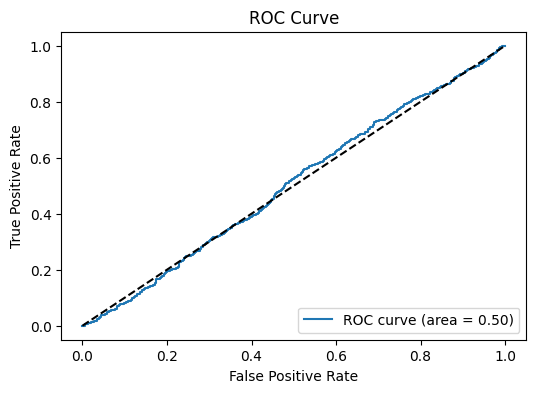

In [ ]:
y_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()